# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                 
    results = model.process(image)                
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [8]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

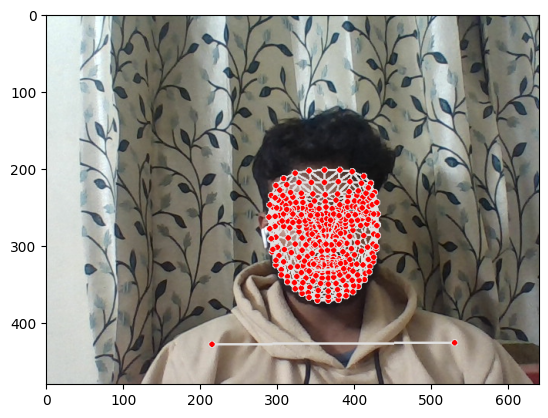

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.56863874,  0.62108386, -1.34968293, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.56863874,  0.62108386, -1.34968293, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [96]:

DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [97]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [98]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:s
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

              
                ret, frame = cap.read()

              
                image, results = mediapipe_detection(frame, holistic)
#             

            
                draw_styled_landmarks(image, results)
                
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
            
                    cv2.imshow('OpenCV Feed', image)
                

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)


                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [30]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [100]:
label_map = {label:num for num, label in enumerate(actions)}

In [101]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [102]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [103]:
np.array(sequences).shape

(90, 30, 1662)

In [104]:
np.array(labels).shape

(90,)

In [105]:
X = np.array(sequences)

In [106]:
X.shape

(90, 30, 1662)

In [107]:
y = to_categorical(labels).astype(int)

In [108]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [110]:
y_test.shape

(5, 3)

In [111]:
X_test.shape

(5, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [23]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

NameError: name 'actions' is not defined

In [115]:
res = [.7, 0.2, 0.1]

In [116]:
actions[np.argmax(res)]

'hello'

In [117]:
import tensorflow as tf
from tensorflow.compat.v1 import train
import tensorflow as tf
from keras.models import Sequential


In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [119]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 79ms/step - loss: 2.3765 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.6823 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.7063 - categorical_accuracy: 0.2824
Epoch 4/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.1821 - categorical_accuracy: 0.4235
Epoch 5/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0985 - categorical_accuracy: 0.5647
Epoch 6/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.3545 - categorical_accuracy: 0.3882
Epoch 7/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.7639 - categorical_accuracy: 0.4471
Epoch 8/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.9254 - categorical_accuracy: 0.4118
Epoch 9/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.5808 - categorical_accuracy: 0.7294
E

3/3 [==============================] - 0s 111ms/step - loss: 1.0788 - categorical_accuracy: 0.3647
Epoch 146/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0880 - categorical_accuracy: 0.3647
Epoch 147/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0646 - categorical_accuracy: 0.4471
Epoch 148/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0738 - categorical_accuracy: 0.3647
Epoch 149/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0648 - categorical_accuracy: 0.4824
Epoch 150/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1013 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0894 - categorical_accuracy: 0.3882
Epoch 152/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0753 - categorical_accuracy: 0.4118
Epoch 153/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0880 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0774 - categorical_accuracy: 0.4353
Epoch 218/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0942 - categorical_accuracy: 0.4471
Epoch 219/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0799 - categorical_accuracy: 0.4353
Epoch 220/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0702 - categorical_accuracy: 0.4353
Epoch 221/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0697 - categorical_accuracy: 0.4471
Epoch 222/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0677 - categorical_accuracy: 0.4588
Epoch 223/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0742 - categorical_accuracy: 0.3529
Epoch 224/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0454 - categorical_accuracy: 0.5529
Epoch 225/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.0893 - cat

Epoch 360/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4369 - categorical_accuracy: 0.8000
Epoch 361/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.4312 - categorical_accuracy: 0.7882
Epoch 362/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.4337 - categorical_accuracy: 0.7647
Epoch 363/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.4260 - categorical_accuracy: 0.7882
Epoch 364/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4289 - categorical_accuracy: 0.7529
Epoch 365/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4246 - categorical_accuracy: 0.7882
Epoch 366/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.4200 - categorical_accuracy: 0.8000
Epoch 367/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.4249 - categorical_accuracy: 0.8000
Epoch 368/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4179 - cat

Epoch 503/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.1429 - categorical_accuracy: 0.4941
Epoch 504/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.8269 - categorical_accuracy: 0.6588
Epoch 505/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.8267 - categorical_accuracy: 0.6471
Epoch 506/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.7350 - categorical_accuracy: 0.6353
Epoch 507/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5929 - categorical_accuracy: 0.6824
Epoch 508/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5947 - categorical_accuracy: 0.7412
Epoch 509/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.5066 - categorical_accuracy: 0.9412
Epoch 510/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.4524 - categorical_accuracy: 0.9059
Epoch 511/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.3486 - cat

3/3 [==============================] - 0s 115ms/step - loss: 1.2187e-04 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.1986e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1819e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1653e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1474e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1304e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.1145e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0986e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 117ms/step - l

3/3 [==============================] - 0s 107ms/step - loss: 3.3163e-05 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.2961e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 112ms/step - loss: 3.2754e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 113ms/step - loss: 3.2524e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.2332e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.2158e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.1920e-05 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.1739e-05 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 112ms/step - l

3/3 [==============================] - 0s 116ms/step - loss: 1.6593e-05 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6537e-05 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.6467e-05 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.6408e-05 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6335e-05 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6271e-05 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.6206e-05 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.6145e-05 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 110ms/step - l

KeyboardInterrupt: 

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# 8. Make Predictions

In [121]:
res = model.predict(X_test)

1/1 [==============================] - 1s 660ms/step


In [140]:
actions[np.argmax(res[5])]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [139]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [141]:
model.save('action.h5')

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [142]:
del model

In [146]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [147]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [148]:
yhat = model.predict(X_train)

3/3 [==============================] - 1s 22ms/step


In [149]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [150]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[58,  0],
        [ 0, 27]],

       [[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [151]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [152]:
X_test[0].shape

(30, 1662)

In [153]:
from scipy import stats


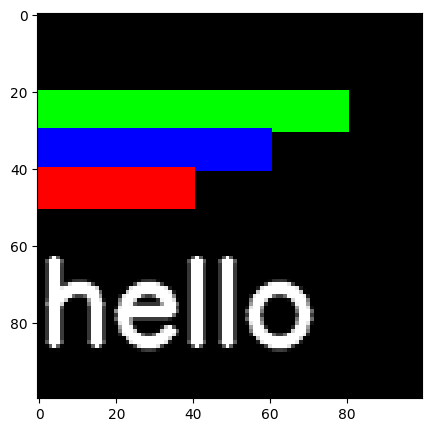

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        width = int(prob[0] * 150) if isinstance(prob, np.ndarray) else int(prob * 100)
        cv2.rectangle(output_frame, (0, 30 + num * 10), (width, 20 + num * 10), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

# Example usage
res = np.array([0.8, 0.6, 0.4])
actions = ["hello", "thanks", "I LOVE YOU"]
image = np.zeros((100, 100, 3), dtype=np.uint8)  # Replace this with your actual image
colors = [(0, 255, 0), (0, 0, 255), (255, 0, 0)]  # Replace this with your desired colors

plt.figure(figsize=(5, 5))
plt.imshow(prob_viz(res, actions, image, colors))
plt.show()


In [26]:

sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()


        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            

            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
 
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'actions' is not defined

In [110]:
cap.release()
cv2.destroyAllWindows()

In [116]:
res[np.argmax(res)] > threshold

True

In [118]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 31ms/step


array([[2.1850334e-12, 9.9936653e-17, 1.0000000e+00]], dtype=float32)